In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 20

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_600_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
maize.handysize_perc = 0
maize.handymax_perc = 100
maize.panamax_perc = 0
maize.handling_fee = 9.8 # example Wijnand

wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

maize.scenario_data = pd.DataFrame(data=scenario_data)
maize.historic_data = []
wheat.scenario_data = []
wheat.historic_data = []
soybeans.scenario_data = []
soybeans.historic_data = []

demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [5]:
Terminal = system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, 
                         storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 15
     Handysize calls: 0
     Handymax calls: 15
     Panamax calls: 0
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy planned (after adding

      a total of 65000 ton of storage capacity is online; 75000 ton total planned
  *** add storage to elements
      a total of 65000 ton of storage capacity is online; 80000 ton total planned
  *** add storage to elements
      a total of 65000 ton of storage capacity is online; 85000 ton total planned
  *** add storage to elements
      a total of 65000 ton of storage capacity is online; 90000 ton total planned
     Station occupancy planned (@ start of year): 0.49542966137382644
     Station occupancy online (@ start of year): 0.49542966137382644
  *** add station to elements
    station_occupancy_planned: 0.24771483068691322

Simulate year: 2024
  Total vessel calls: 32
     Handysize calls: 0
     Handymax calls: 32
     Panamax calls: 0
  Total cargo volume: 1600000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 1 Quay_01 is online; 2 total planned
     a total of 3 Mobile_crane_01 is online; 5 total planned
     a total of 0 [] is online; 0 total planned


## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data': [], 'scenario_data':     year   volume
0   2018   750000
1   2019   750000
2   2020   750000
3   2021   750000
4   2022   750000
5   2023  1600000
6   2024  1600000
7   2025  1600000
8   2026  1600000
9   2027  1600000
10  2028  1600000
11  2029  1600000
12  2030  1600000
13  2031  1600000
14  2032  1600000
15  2033  1600000
16  2034  1600000
17  2035  1600000
18  2036  1600000
19  2037  1600000, 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 100, 'panamax_perc': 0, 'name': 'Maize', 'id': 'f039de6c-51fd-11e9-8ca7-60f677ba2ce0'}

Wheat

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Wheat', 'id': 'f03a06d2-51fd-11e9-9543-60f677ba2ce0'}

Soybeans

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Soybeans', 'id': 'f03a06d3-51fd-11e9-860e-60f677ba2ce0'}

Handysize_1

{'type': 'Hand

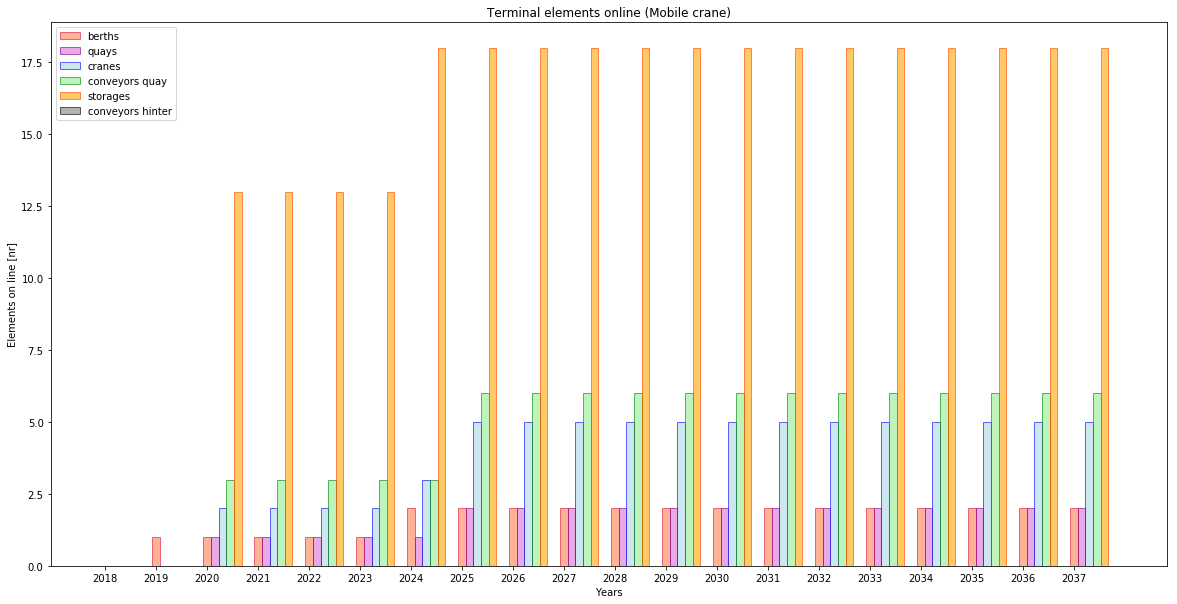

In [8]:
Terminal.terminal_elements_plot()

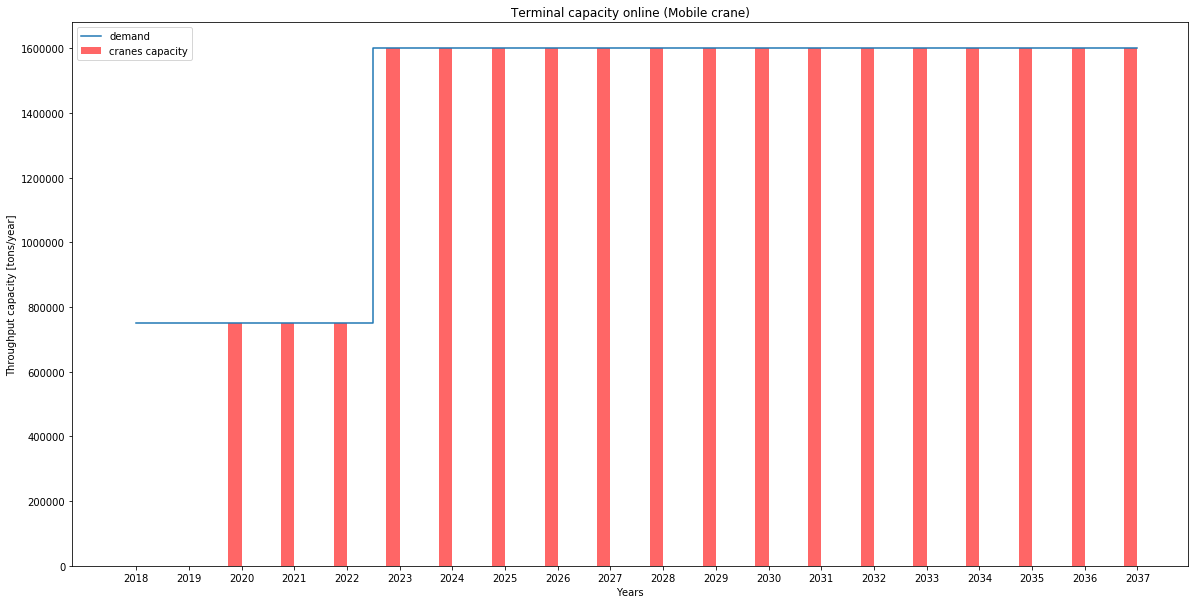

In [9]:
Terminal.terminal_capacity_plot()

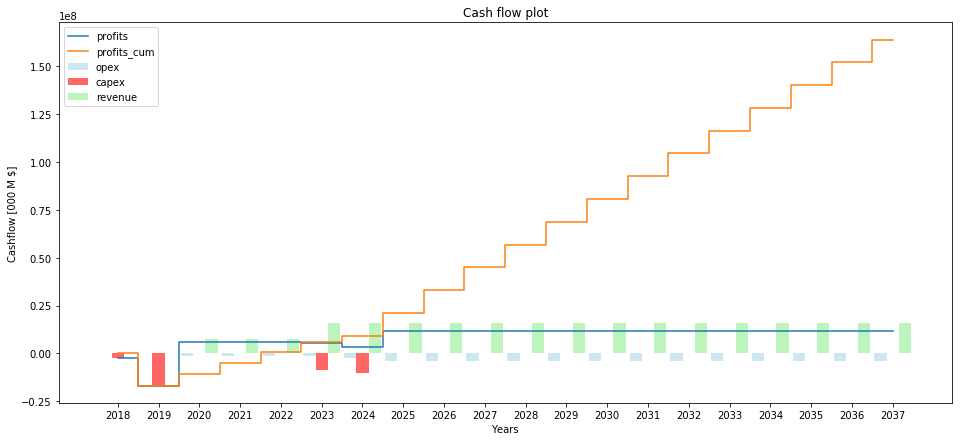

In [10]:
Terminal.cashflow_plot()

## SandBox

In [11]:
Terminal.NPV()

PV: [ -2602528.         -16775852.           5844474.07692308
   5844474.07692308   5844474.07692308   5254347.87692308
   3196864.28340135  11902102.84683045  11902102.84683045
  11902102.84683045  11902102.84683045  11902102.84683045
  11902102.84683045  11902102.84683045  11902102.84683045
  11902102.84683045  11902102.84683045  11902102.84683045
  11902102.84683045  11902102.84683045]
NPV: 161333591.39988953
